In [31]:
import pandas as pd
import csv
import time
import openpyxl
from pandas import DataFrame
import matplotlib.pyplot as plt

In [12]:
from itertools import islice



AttributeError: 'DataFrame' object has no attribute 'cmdb_id'

In [50]:
int(int(times[0]) / 1e9)

1614316143

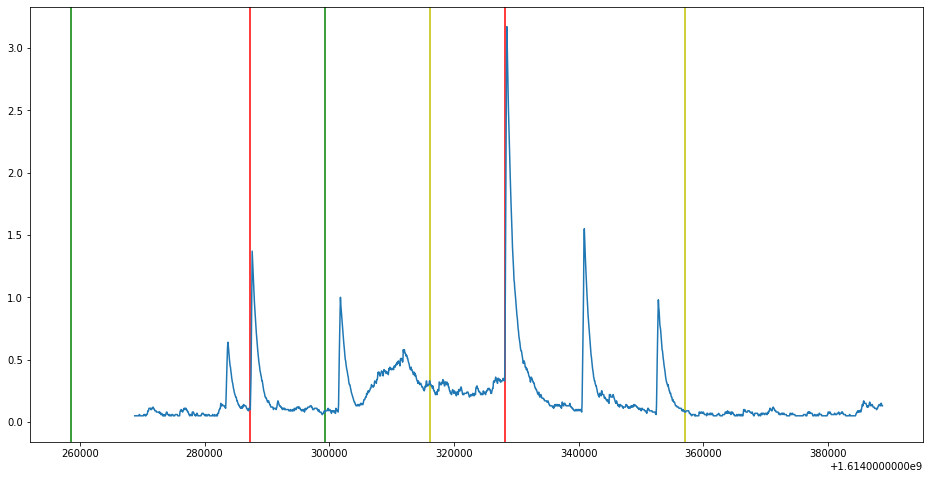

In [69]:
gt_file = "../../data/groundtruth_a.xlsx"
wb = openpyxl.open(gt_file)
ws = wb.active
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = DataFrame(data, index=idx, columns=cols)
df['time'] = pd.to_datetime(df.time)
df['time'] = df['time'] - pd.Timedelta('08:00:00')
gjjcore3 = df[df.cmdb_id == 'gjjcore3']
times = gjjcore3[gjjcore3.故障内容 == 'CPU使用率高'].time.values

data_file = "../../data/system-a/gjjcore3##system.load.15.csv"
# data_file = "../../data/system-a/gjjcore3##system.cpu.pct_usage.csv"

df = pd.read_csv(data_file, index_col=0)
df.drop(columns=["cmdb_id", "kpi_name"], inplace=True)
plt.figure(figsize=(16,8))
for i in times[:2]:
    xvalue = int(int(i) / 1e9)
    plt.axline((xvalue, 0), (xvalue, 1), color='r')
    bvalue = xvalue + 8 * 60 * 60
    plt.axline((bvalue, 0), (bvalue, 1), color='y')
    prevalue = xvalue - 8*60*60
    plt.axline((prevalue, 0), (prevalue, 1), color='g')
plt.plot(df.timestamp[:2000], df.value[:2000])